In [272]:
# get access to the complete repo
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(),"..",".."))
main_copy_dir = os.path.join(parent_dir, "main_copy")
octagon_analysis = os.path.join(parent_dir, "octagon_analysis")
sys.path.append(main_copy_dir)
sys.path.append(octagon_analysis)

print("Added paths to sys.path", main_copy_dir, octagon_analysis)

Added paths to sys.path /Users/benny/Desktop/MSc/Project/Git/repos/main_copy /Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis


In [273]:
# imports
%load_ext autoreload
%autoreload 2

import parse_data.prepare_data as prepare_data
import analysis.opponent_visibility as opponent_visibility
import trajectory_analysis.trajectory_vectors as trajectory_vectors
import trajectory_analysis.trajectory_headangle as trajectory_headangle
import trajectory_analysis.trajectory_direction as trajectory_direction
import data_extraction.trial_list_filters as trial_list_filters
import data_extraction.get_indices as get_indices
from plotting import plot_octagon, plot_trajectory
import utils.cosine_similarity as cosine_similarity
import data_extraction.extract_trial as extract_trial
import parse_data.identify_filepaths as identify_filepaths
import analysis.loser_inferred_choice as loser_inferred_choice
import plotting.flipped_rotated_trajectory_testing_functions as flipped_rotated_trajectory_testing_functions
import plotting.wall_visibility_order_testing_functions as wall_visibility_order_testing_functions


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import globals

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [274]:
# data folder and filenames
data_folder = "/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/pseudonymised_json_files"

social_files, ordered_solos = identify_filepaths.get_filenames(data_folder=data_folder)

In [332]:
# single json filename

json_filename = social_files[14]

In [333]:
_, trial_list = prepare_data.prepare_data(data_folder, json_filename, combine=True)

filepath: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy/questionnaire_analysis/pseudonymised_json_files/250204_1/2025-02-04_15-55-44_IN04_JL04_Social.json
Loading complete.
Preprocessing complete.


In [ ]:
wall_visible = trajectory_headangle.get_wall_visible(trial_list=trial_list, trial_index=14, trial=None, player_id=1, current_fov=110.36, debug=False)

In [307]:
wall_visible

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         Tru

In [311]:
def wall_visibility_player_window(trial_list, current_fov, window=5):
    ''' 
    Returns 3D binary array for player 0 and player 1 - for wall 1 and wall 2. 
    Column length = length of the session (trial list). 
    Column entry: 1 --> wall visible between trial slice onset and end of the chosen window
    Note get_wall_visible extracts trial so that index 0 is slice onset and not trial start.
    '''
    cols = len(trial_list)
    wall_visible_list = np.full((2,2,cols), 0, dtype=int)
    walls_list = np.full((2,cols), 0, dtype=int)
    #dtype=int)
    wall_index = np.full((2,1), np.nan, dtype=int)

    for trial_index in range(len(trial_list)):
        # identify walls for each trial
        walls = get_indices.get_walls(trial=trial_list[trial_index])
        walls_list[0,trial_index] = walls[0]
        walls_list[1,trial_index] = walls[1]

        # take the wall index instead of the wall number, to index wall_visible
        wall_index[0] = walls[0] - 1
        wall_index[1] = walls[1] - 1

        for player_id in [0,1]:
          wall_visible = trajectory_headangle.get_wall_visible(trial_list=trial_list, trial_index=trial_index, trial=None, player_id=player_id, current_fov=current_fov, debug=False)
          
          for wall in [0,1]:
            print(f"checking out wall {wall}")
            if type(wall_visible) == int or type(wall_visible) == float:
              print(f"output type is {type(wall_visible)}")
              print(f"wall visible is buggy for player {player_id} in trial {trial_index}, output is: {wall_visible}")

            else:
              print(f"relevant wall is {walls[wall]}")
              print(f"printing wall visible output for player {player_id} and wall {wall} in trial {trial_index} {wall_visible[wall_index[wall],0:window]}")

              # identify which walls are initially visible
              if np.any(wall_visible[wall_index[wall],0:window]):
                  wall_visible_list[player_id,wall,trial_index] = 1
     
    return walls_list, wall_visible_list

In [334]:
walls_list, wall_visible_list = wall_visibility_player_window(trial_list, 110, window=5)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/_core/numeric.py:353: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


checking out wall 0
relevant wall is 1
printing wall visible output for player 0 and wall 0 in trial 0 [[ True  True  True  True  True]]
checking out wall 1
relevant wall is 2
printing wall visible output for player 0 and wall 1 in trial 0 [[ True  True  True  True  True]]
checking out wall 0
relevant wall is 1
printing wall visible output for player 1 and wall 0 in trial 0 [[ True  True  True  True  True]]
checking out wall 1
relevant wall is 2
printing wall visible output for player 1 and wall 1 in trial 0 [[False False False False False]]
checking out wall 0
relevant wall is 3
printing wall visible output for player 0 and wall 0 in trial 1 [[ True  True  True  True  True]]
checking out wall 1
relevant wall is 2
printing wall visible output for player 0 and wall 1 in trial 1 [[False False False False False]]
checking out wall 0
relevant wall is 3
printing wall visible output for player 1 and wall 0 in trial 1 [[ True  True  True  True  True]]
checking out wall 1
relevant wall is 2
pr

In [335]:
wall_visible_list

array([[[1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
         0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
         0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0],
        [1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
         0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
         0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]],

       [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
         0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
         0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0],
        [0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
         0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
         0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]]])

In [454]:
def plot_session_headangle_vectors_colour_map(trial_list=None, player_id=0, 
                                        vector_length=3, step=3, cmap=mpl.cm.plasma, rows=10, cols=10, trial_num_offset=0):
    '''
    Plots head angle vectors for a given player in a whole list of trials, using a color map based on timestamps.

    Parameters:
    - trial_list: List of trials
    - trial_index: Index of trial in the list
    - trial: A single trial
    - player_id: ID of the player whose head angles we want to plot
    - vector_length: Scale factor for head angle vectors
    - step: How frequently to plot head angle vectors (e.g., every 3rd point)
    - cmap: Colormap for timestamps.

    Returns:
    - ax: Updated axis with head angle vectors plotted
    '''

    fig, axes = plt.subplots(rows, cols, figsize=(20,20))

    # get walls and visibility
    walls_session, wall_visible_trial_list = wall_visibility_player_window(trial_list, 110, window=5)

    active_wall_visible = {}

    for i in range(rows):
        for j in range(cols):
            trial_index = i * cols + j + trial_num_offset

            if trial_index >= len(trial_list):
                continue

            trial = trial_list[trial_index]

            # extract trial data
            this_trial = extract_trial.extract_trial(trial, trial_list, trial_index)

            trajectory = trajectory_vectors.extract_trial_player_trajectory(trial=this_trial, player_id=player_id)

            # extract head angles for the player
            # I am pretty sure this function extracts the trial itself so I feed it the raw trial
            headangles = trajectory_vectors.extract_trial_player_headangles(trial=trial, player_id=player_id)
            print(f"debugging: headangles are length {len(headangles)}")

            # get smoothed head angle vectors
            trial_player_headangles_smoothed = trajectory_headangle.get_smoothed_player_head_angle_vectors_for_trial(headangles, window_size=5)
            print(f"debugging: trial_player_headangles_smoothed are length {len(trial_player_headangles_smoothed)}")

            # generate timestamps
            timestamps = np.arange(trial_player_headangles_smoothed.shape[1])
            print(f"debugging: timestamps are length {len(timestamps)}")

            if len(timestamps) > 0:

                # normalize timestamps for colormap
                norm = mpl.colors.Normalize(vmin=min(timestamps), vmax=max(timestamps))
                color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

                # plot octagon
                ax = plot_octagon.plot_octagon(ax=axes[i,j])

                # scatter trajectory
                ax.scatter(trajectory[0,:], trajectory[1,:], s=0.5)

                # plot head angle vectors at specified intervals with colormap
                for time_index in range(0, trial_player_headangles_smoothed.shape[1], step):
                    x_start = trajectory[0,time_index]
                    y_start = trajectory[1,time_index]
                    x_gradient = trial_player_headangles_smoothed[0, time_index]
                    y_gradient = trial_player_headangles_smoothed[1, time_index]

                    start = [x_start, y_start]
                    end = [x_start + x_gradient * vector_length, y_start + y_gradient * vector_length]

                    this_head_angle_vector_coordinates = np.array([start, end])
                    print(f"head angle vector coords {this_head_angle_vector_coordinates}")

                    # taking x and y coordinates for start and end of vector
                    ax.plot(this_head_angle_vector_coordinates[:, 0], 
                            this_head_angle_vector_coordinates[:, 1], 
                            c=color_map.to_rgba(timestamps[time_index]), linewidth=1.3)

                # plot first smoothed head angle in red
                x_start = trajectory[0,0]
                y_start = trajectory[1,0]
                x_gradient = trial_player_headangles_smoothed[0, 0]
                y_gradient = trial_player_headangles_smoothed[1, 0]

                start = [x_start, y_start]
                end = [x_start + x_gradient * vector_length*5, y_start + y_gradient * vector_length*5]

                this_head_angle_vector_coordinates = np.array([start, end])
                ax.plot(this_head_angle_vector_coordinates[:, 0], 
                            this_head_angle_vector_coordinates[:, 1], 
                            c="red", linewidth=0.75)

                # plot active walls
                alcove_coordinates = plot_octagon.return_alcove_centre_points()
                walls = get_indices.get_walls(trial=this_trial)
                wall1_index = walls[0] - 1
                wall2_index = walls[1] - 1

                # Use ax.scatter() to plot walls on the correct axis
                ax.scatter(alcove_coordinates[0, wall1_index], alcove_coordinates[1, wall1_index], c='r', s=50, zorder=5)
                ax.scatter(alcove_coordinates[0, wall2_index], alcove_coordinates[1, wall2_index], c='b', s=50, zorder=5)

                # hide spines and ticks
                for spine in ax.spines.values():
                    spine.set_visible(False)
                ax.tick_params(left=False, bottom=False)
                ax.set_xticklabels([])
                ax.set_yticklabels([])

            if trial_index < len(trial_list):
                
                active_wall_visible[trial_index] = [
                    [walls_session[0][trial_index], wall_visible_trial_list[player_id][0][trial_index]],
                    [walls_session[1][trial_index], wall_visible_trial_list[player_id][1][trial_index]]
                ]

    plt.tight_layout()

    plt.show()

    return active_wall_visible

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/_core/numeric.py:353: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


checking out wall 0
relevant wall is 1
printing wall visible output for player 0 and wall 0 in trial 0 [[ True  True  True  True  True]]
checking out wall 1
relevant wall is 2
printing wall visible output for player 0 and wall 1 in trial 0 [[ True  True  True  True  True]]
checking out wall 0
relevant wall is 1
printing wall visible output for player 1 and wall 0 in trial 0 [[ True  True  True  True  True]]
checking out wall 1
relevant wall is 2
printing wall visible output for player 1 and wall 1 in trial 0 [[False False False False False]]
checking out wall 0
relevant wall is 3
printing wall visible output for player 0 and wall 0 in trial 1 [[ True  True  True  True  True]]
checking out wall 1
relevant wall is 2
printing wall visible output for player 0 and wall 1 in trial 1 [[False False False False False]]
checking out wall 0
relevant wall is 3
printing wall visible output for player 1 and wall 0 in trial 1 [[ True  True  True  True  True]]
checking out wall 1
relevant wall is 2
pr

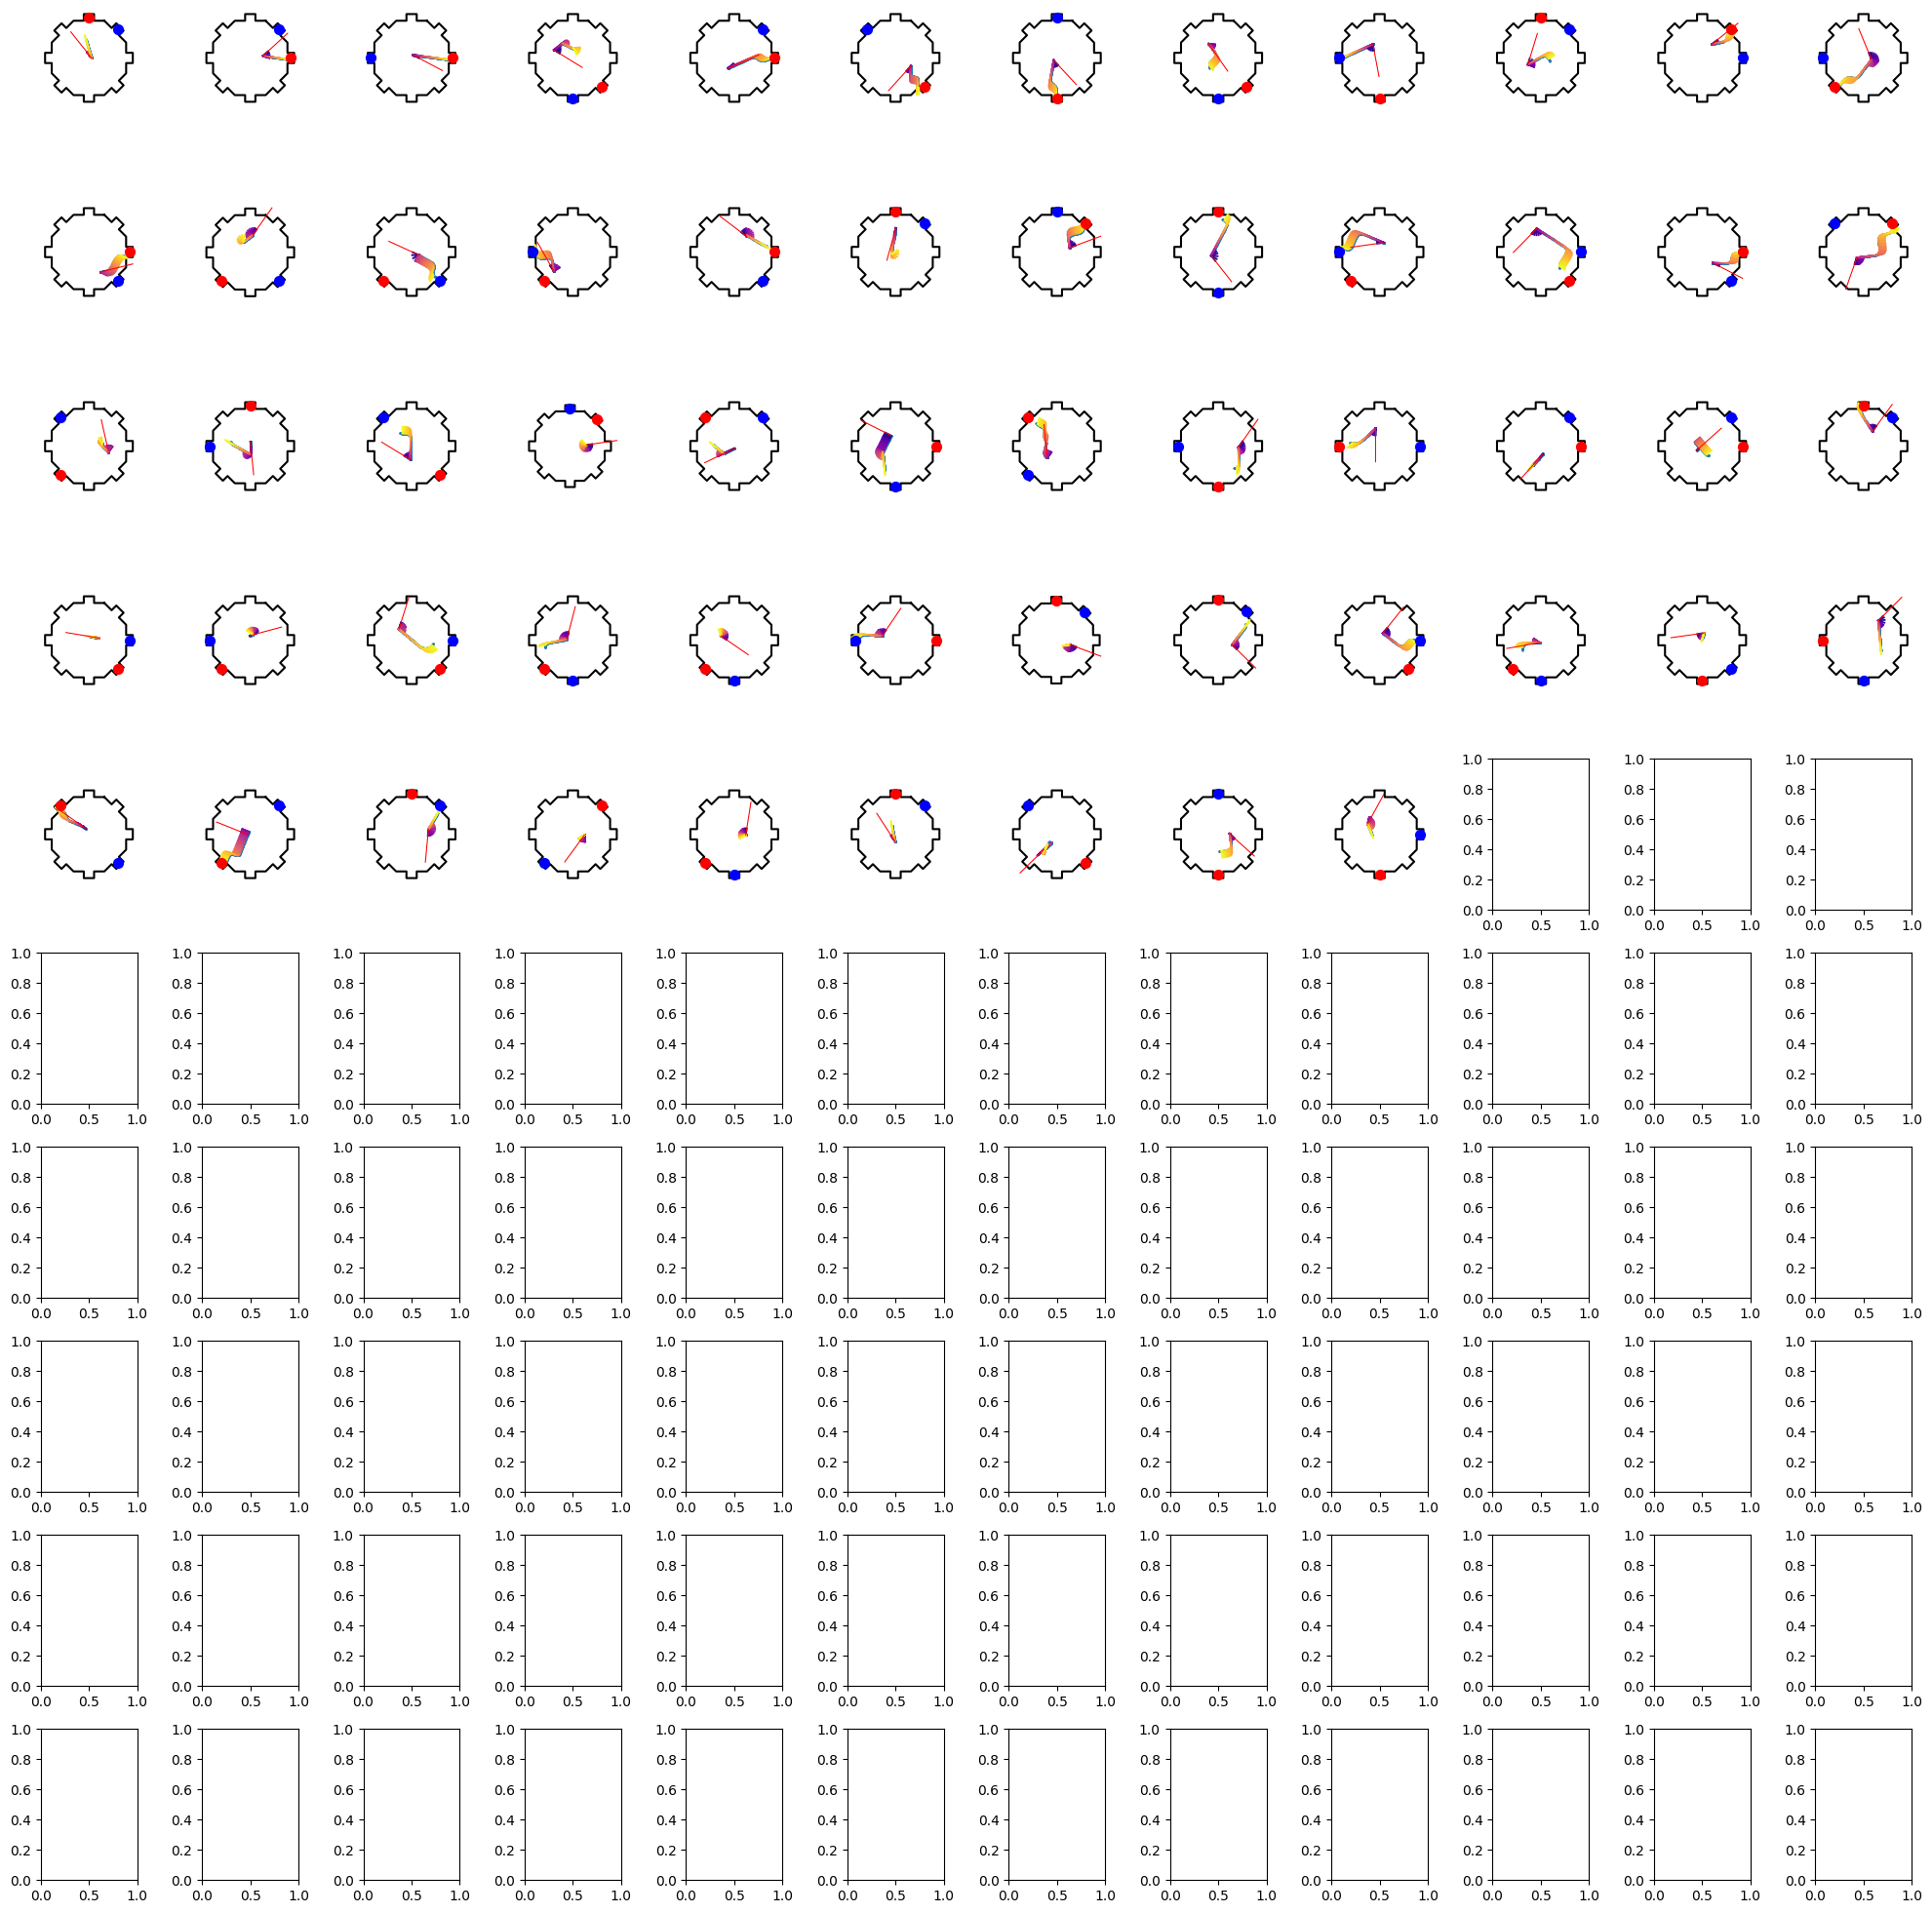

In [352]:
active_wall_visible = plot_session_headangle_vectors_colour_map(trial_list=trial_list, player_id=1,
                                        vector_length=3, step=3, cmap=mpl.cm.plasma, rows=10, cols=12, trial_num_offset=0)

In [329]:
active_wall_visible

{0: [[np.int64(3), np.int64(0)], [np.int64(1), np.int64(1)]],
 1: [[np.int64(2), np.int64(0)], [np.int64(6), np.int64(1)]],
 2: [[np.int64(7), np.int64(1)], [np.int64(3), np.int64(0)]],
 3: [[np.int64(7), np.int64(1)], [np.int64(1), np.int64(0)]],
 4: [[np.int64(7), np.int64(0)], [np.int64(8), np.int64(0)]],
 5: [[np.int64(7), np.int64(0)], [np.int64(6), np.int64(1)]],
 6: [[np.int64(1), np.int64(0)], [np.int64(2), np.int64(0)]],
 7: [[np.int64(2), np.int64(1)], [np.int64(3), np.int64(1)]],
 8: [[np.int64(2), np.int64(1)], [np.int64(3), np.int64(0)]],
 9: [[np.int64(6), np.int64(1)], [np.int64(2), np.int64(0)]],
 10: [[np.int64(8), np.int64(1)], [np.int64(1), np.int64(0)]],
 11: [[np.int64(4), np.int64(0)], [np.int64(5), np.int64(0)]],
 12: [[np.int64(1), np.int64(1)], [np.int64(5), np.int64(0)]],
 13: [[np.int64(6), np.int64(1)], [np.int64(5), np.int64(1)]],
 14: [[np.int64(8), np.int64(1)], [np.int64(2), np.int64(0)]],
 15: [[np.int64(4), np.int64(1)], [np.int64(6), np.int64(1)]],
 1

In [ ]:
    for trial_index in range(len(trial_list)):

        # extract trial data
        this_trial = extract_trial.extract_trial(trial_list[trial_index], trial_list, trial_index)

        trajectory = trajectory_vectors.extract_trial_player_trajectory(trial=this_trial, player_id=player_id)
        
        alcoves = plot_octagon.return_alcove_centre_points()
        for i in range(8):
            alcove_x = alcoves[0][i]
            alcove_y = alcoves[1][i]


np.float64(-5.329070518200751e-15)

In [353]:
this_trial = extract_trial.extract_trial(trial_list[1], trial_list, 1)
trajectory = trajectory_vectors.extract_trial_player_trajectory(trial=this_trial, player_id=1)

In [382]:
trajectory[1]

array([ 0.95667386,  0.95667386,  0.95667386,  0.95667386,  0.95667386,
        0.95667386,  0.95667386,  0.95667386,  0.95667386,  0.95667386,
        0.95667386,  0.95667386,  0.95667386,  0.95667386,  0.95667386,
        0.95667386,  0.95667386,  0.95667386,  0.95667386,  0.9566738 ,
        0.9566738 ,  0.9566738 ,  0.9566738 ,  0.9566738 ,  0.9566738 ,
        0.9566738 ,  0.9566738 ,  0.9566738 ,  0.9566738 ,  0.9566738 ,
        0.9566738 ,  0.9566738 ,  0.95633978,  0.95537639,  0.95428568,
        0.95135903,  0.94791812,  0.94319564,  0.93663412,  0.92872441,
        0.91984671,  0.90876871,  0.89807242,  0.88269001,  0.86761886,
        0.85054076,  0.83079743,  0.81220794,  0.78775752,  0.76287311,
        0.74047625,  0.71293855,  0.6873644 ,  0.66053319,  0.63252693,
        0.60432905,  0.57675272,  0.54798281,  0.52186167,  0.49132544,
        0.46324849,  0.43460253,  0.40491763,  0.37808576,  0.34693459,
        0.31662005,  0.28983706,  0.25879502,  0.23032837,  0.20

In [414]:
import math
p1 = (alcoves[0][0], alcoves[1][0])
p2 = (alcoves[0][4], alcoves[1][4])
print(math.dist(p1,p2)/2)

p3 = (alcoves[0][2], alcoves[1][2])
p4 = (alcoves[0][6], alcoves[1][6])
print(math.dist(p3,p4)/2)

18.22683893611684
18.22683893611684


In [413]:
alcoves = plot_octagon.return_alcove_centre_points()

In [438]:
# is the player past the alcove centre?

def is_player_past_alcove(trial_list=trial_list, player_id=0, centre=(0,0), wall_num=8):
    '''
    Returns a binary array of shape (number of trials, number of walls, timepoints)
    indicating whether the player was past the defined alcove centre at the indexed time point over the course of the trial
    '''
    # get alcove centre points
    alcoves = plot_octagon.return_alcove_centre_points()

    # compute direction vector from arena centre to alcove centre
    alcove_vectors = np.full((8,2), 0, dtype=float)
    vector_units = np.full((8,2), 0, dtype=float)

    centre = centre
    centre_x = centre[0]
    centre_y = centre[1]

    for i in range(8):
        alcove = (alcoves[0][i], alcoves[1][i])
        alcove_x = alcoves[0][i]
        alcove_y = alcoves[1][i]
        alcove_vector = np.array([alcove_x - centre_x, alcove_y - centre_y])
        #print(alcove_vector)
        for j in range(2):
            alcove_vectors[i][j] = alcove_vector[j]

        vector_units[i] = alcove_vectors[i]/np.linalg.norm(alcove_vectors[i])

    # compute vector from arena to player position

    for trial_index in range(len(trial_list)):

        this_trial = extract_trial.extract_trial(trial_list[trial_index], trial_list, trial_index)
        trajectory = trajectory_vectors.extract_trial_player_trajectory(trial=this_trial, player_id=player_id)

        x = len(trial_list)
        y = wall_num
        z = len(trajectory[0])
        projected_depths = np.full((x,y,z), 0, dtype=float)
        past_alcove_array = np.full((x,y,z), 0, dtype=int)

        for k in range(len(trajectory[0])):
            x_pos = trajectory[0][k]
            y_pos = trajectory[1][k]
            player_vector = ([x_pos - centre_x, y_pos - centre_y])
            #print(player_vector)
            for i in range(8):
                projected_depth = np.dot(player_vector, vector_units[i])
                #print(projected_depth)
                #projected_depths[i] = projected_depth
                #print(projected_depths[i])

                #is_past_alcove = projected_depths[i][k] > np.linalg.norm(alcove_vectors[i])
                is_past_alcove = projected_depth > np.linalg.norm(alcove_vectors[i])
                #print(is_past_alcove)
                is_past_alcove = int(is_past_alcove)

                past_alcove_array[trial_index][i][k] = is_past_alcove

    past_alcove_indices = np.argwhere(past_alcove_array == 1)

    return past_alcove_array, past_alcove_indices

In [440]:
past_alcove_array, past_alcove_indices = is_player_past_alcove(trial_list=trial_list, player_id=0, centre=(0,0), wall_num=8)

In [442]:
past_alcove_array[56, 4, 150]

np.int64(1)

In [441]:
past_alcove_indices

array([[ 56,   4, 150],
       [ 56,   4, 151]])

In [468]:
this_trial = extract_trial.extract_trial(trial_list[1], trial_list, 1)
trajectory = trajectory_vectors.extract_trial_player_trajectory(trial=this_trial, player_id=1)
headangles = trajectory_vectors.extract_trial_player_headangles(trial=trial_list[1], player_id=1)
trial_player_headangles_smoothed = trajectory_headangle.get_smoothed_player_head_angle_vectors_for_trial(headangles, window_size=5)

In [473]:
len(trial_player_headangles_smoothed[0])

96

In [472]:
len(headangles)


101

In [476]:
def plot_headangle_vectors_colour_map(trial_list=trial_list, trial_index=trial_index, timepoint=0, player_id=0, 
                                        visibility_window=5, headangles_smoothing_window=5,
                                        vector_length=3, step=3, cmap=mpl.cm.plasma, ax=None):
    '''
----------
    '''

    # get walls and visibility
    walls_session, wall_visible_trial_list = wall_visibility_player_window(trial_list, 110, window=visibility_window)

    trial = trial_list[trial_index]

    # extract trial data
    this_trial = extract_trial.extract_trial(trial, trial_list, trial_index)

    trajectory = trajectory_vectors.extract_trial_player_trajectory(trial=this_trial, player_id=player_id)

    # extract head angles for the player
    headangles = trajectory_vectors.extract_trial_player_headangles(trial=trial, player_id=player_id)
    print(f"debugging: headangles are length {len(headangles)}")

    # get smoothed head angle vectors
    trial_player_headangles_smoothed = trajectory_headangle.get_smoothed_player_head_angle_vectors_for_trial(headangles, window_size=headangles_smoothing_window)
    print(f"debugging: trial_player_headangles_smoothed are length {len(trial_player_headangles_smoothed)}")

    # generate timestamps
    timestamps = np.arange(trial_player_headangles_smoothed.shape[1])
    print(f"debugging: timestamps are length {len(timestamps)}")

    if len(timestamps) > 0:

        # normalize timestamps for colormap
        norm = mpl.colors.Normalize(vmin=min(timestamps), vmax=max(timestamps))
        color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

        # plot octagon
        ax = plot_octagon.plot_octagon(ax=ax)

        # scatter trajectory
        ax.scatter(trajectory[0,:], trajectory[1,:], s=0.5)

        # plot head angle vectors at specified intervals with colormap
        for time_index in range(0, trial_player_headangles_smoothed.shape[1], step):
            x_start = trajectory[0,time_index]
            y_start = trajectory[1,time_index]
            x_gradient = trial_player_headangles_smoothed[0, time_index]
            y_gradient = trial_player_headangles_smoothed[1, time_index]

            start = [x_start, y_start]
            end = [x_start + x_gradient * vector_length, y_start + y_gradient * vector_length]

            this_head_angle_vector_coordinates = np.array([start, end])
            print(f"head angle vector coords {this_head_angle_vector_coordinates}")

            # taking x and y coordinates for start and end of vector
            ax.plot(this_head_angle_vector_coordinates[:, 0], 
                    this_head_angle_vector_coordinates[:, 1], 
                    c=color_map.to_rgba(timestamps[time_index]), linewidth=1.3)

        # plot smoothed head angle at defined timepoint in red
        x_start = trajectory[0,timepoint]
        y_start = trajectory[1,timepoint]
        x_gradient = trial_player_headangles_smoothed[0,timepoint-headangles_smoothing_window]
        y_gradient = trial_player_headangles_smoothed[1,timepoint-headangles_smoothing_window]

        start = [x_start, y_start]
        end = [x_start + x_gradient * vector_length*5, y_start + y_gradient * vector_length*5]

        this_head_angle_vector_coordinates = np.array([start, end])
        ax.plot(this_head_angle_vector_coordinates[:, 0], 
                    this_head_angle_vector_coordinates[:, 1], 
                    c="red", linewidth=0.75)

        # plot active walls
        alcove_coordinates = plot_octagon.return_alcove_centre_points()
        walls = get_indices.get_walls(trial=this_trial)
        wall1_index = walls[0] - 1
        wall2_index = walls[1] - 1

        # Use ax.scatter() to plot walls on the correct axis
        ax.scatter(alcove_coordinates[0, wall1_index], alcove_coordinates[1, wall1_index], c='r', s=50, zorder=5)
        ax.scatter(alcove_coordinates[0, wall2_index], alcove_coordinates[1, wall2_index], c='b', s=50, zorder=5)

        # hide spines and ticks
        for spine in ax.spines.values():
            spine.set_visible(False)
        ax.tick_params(left=False, bottom=False)
        ax.set_xticklabels([])
        ax.set_yticklabels([])

        if trial_index < len(trial_list):

            active_wall_visible[trial_index] = [
                [walls_session[0][trial_index], wall_visible_trial_list[player_id][0][trial_index]],
                [walls_session[1][trial_index], wall_visible_trial_list[player_id][1][trial_index]]
            ]

        plt.tight_layout()

        plt.show()

    return active_wall_visible

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/_core/numeric.py:353: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


checking out wall 0
relevant wall is 1
printing wall visible output for player 0 and wall 0 in trial 0 [[ True  True  True  True  True]]
checking out wall 1
relevant wall is 2
printing wall visible output for player 0 and wall 1 in trial 0 [[ True  True  True  True  True]]
checking out wall 0
relevant wall is 1
printing wall visible output for player 1 and wall 0 in trial 0 [[ True  True  True  True  True]]
checking out wall 1
relevant wall is 2
printing wall visible output for player 1 and wall 1 in trial 0 [[False False False False False]]
checking out wall 0
relevant wall is 3
printing wall visible output for player 0 and wall 0 in trial 1 [[ True  True  True  True  True]]
checking out wall 1
relevant wall is 2
printing wall visible output for player 0 and wall 1 in trial 1 [[False False False False False]]
checking out wall 0
relevant wall is 3
printing wall visible output for player 1 and wall 0 in trial 1 [[ True  True  True  True  True]]
checking out wall 1
relevant wall is 2
pr

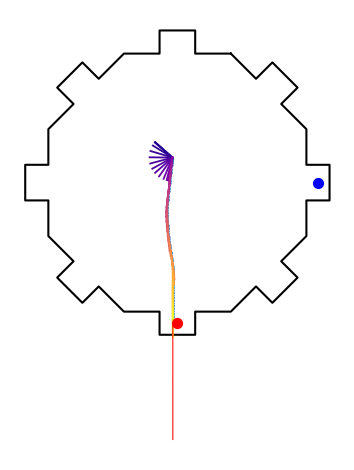

In [477]:
active_wall_visible = plot_headangle_vectors_colour_map(trial_list=trial_list, trial_index=56, timepoint=150, player_id=0, 
                                        vector_length=3, step=3, cmap=mpl.cm.plasma)